In [2]:
import torch
import numpy as np
import librosa 
import matplotlib.pyplot as plt

In [21]:
audio = librosa.load(librosa.util.example('vibeace', hq=True))[0]
device = 'cpu'
filter_length = 1024
hop_length = 256
win_length = 1024 # doesn't need to be specified. if not specified, it's the same as filter_length
window = 'hann'
librosa_stft = librosa.stft(audio, n_fft=filter_length, hop_length=hop_length, window=window)
_magnitude = np.abs(librosa_stft)


audio = torch.FloatTensor(audio)
audio = audio.unsqueeze(0)
audio = audio.to(device)

In [27]:
trans = torch.stft(audio, filter_length, hop_length, win_length, torch.hann_window(win_length), center=True, return_complex=True)[0]
magnitude = trans.real.abs().numpy()
phase = trans.imag.numpy()

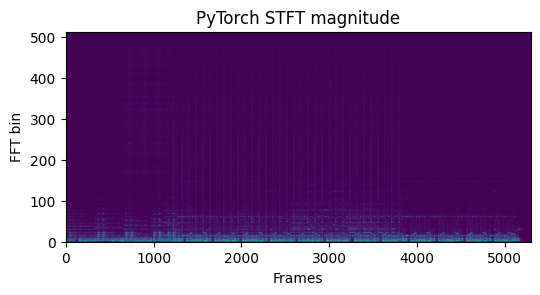

In [28]:
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('PyTorch STFT magnitude')
plt.xlabel('Frames')
plt.ylabel('FFT bin')
plt.imshow(20*np.log10(1+magnitude), aspect='auto', origin='lower')

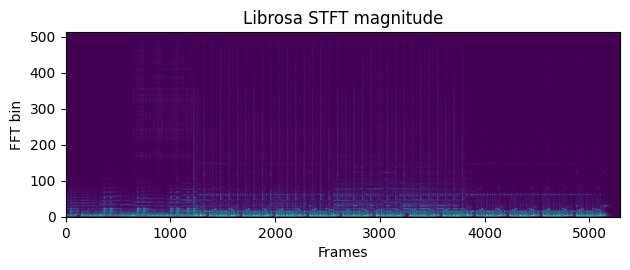

In [29]:
plt.subplot(212)
plt.title('Librosa STFT magnitude')
plt.xlabel('Frames')
plt.ylabel('FFT bin')
plt.imshow(20*np.log10(1+_magnitude), aspect='auto', origin='lower')
plt.tight_layout()

In [30]:
out = torch.istft(trans, filter_length, hop_length, win_length, torch.hann_window(win_length), center=True, return_complex=False).numpy()

In [32]:
from IPython.display import Audio
Audio(out, rate=22050)

In [33]:
Audio(audio.squeeze().numpy(), rate=22050)